# 微分方程模型

使用`scipy.integrate.odeint`来求解微分方程的数值解
该函数的参数说明如下：
func: callable(y, t, …) 　　导数函数 f ( y , t ) f(y,t)f(y,t) ，即 y 在 t 处的导数，以函数的形式表示
y0: array：　　初始条件 y 0 y_0y ，对于常微分方程组 y 0 y_0y  则为数组向量
t: array：　　求解函数值对应的时间点的序列。序列的第一个元素是与初始条件 y 0 y_0y对应的初始时间 t 0 t_0t ；时间序列必须是单调递增或单调递减的，允许重复值。

例一：求解该方程的数值解。
$$ \frac{dy}{dx} = sin(t^2) \\
y(-10)=1$$

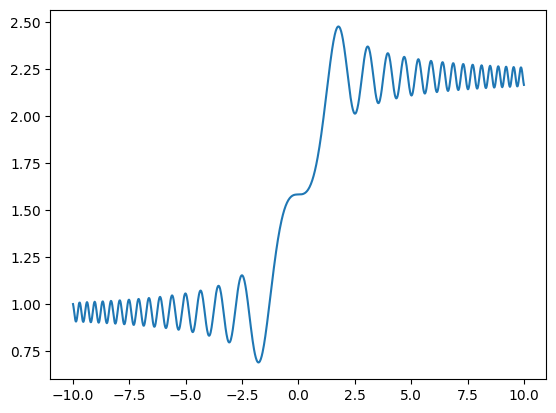

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


def dy_dt(y, t):
    return np.sin(t ** 2)


y0 = 1
t = np.linspace(-10, 10, 1000)
y = odeint(dy_dt, y0, t)

plt.plot(t, y)


例2：求解洛仑兹方程的数值解
洛伦兹混沌吸引子的轨迹可以由如下的三个方程描述；
$$
\begin{cases}
\frac{dx}{dt} = \sigma (y - x) \\
\frac{dy}{dt} = x( \rho - z) - y\\
\frac{dz}{dt} = xy - \beta z
\end{cases}
$$

In [16]:
def lorenz(W, t, p, r, b):
    x, y, z = W  # 解包运算符
    dx_dt = p * (y - x)
    dy_dt = x * (r - z) - y
    dz_dt = x * y - b * z
    return np.array([dx_dt, dy_dt, dz_dt])


t = np.linspace(0, 30, 2000)
params = (10.0, 28.0, 3.0)  # 设置p,r,b的初始参数
W1 = (0.0, 1.00, 0.0)  # 设置x,y,z的初始值
ans = odeint(lorenz, W1, t, args=params)
ans

array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.39747805e-01,  1.01496834e+00,  1.06129009e-03],
       [ 2.66102370e-01,  1.08483586e+00,  4.15778048e-03],
       ...,
       [-5.23935813e-01,  1.44926106e+00,  2.14239771e+01],
       [-2.53640647e-01,  1.38759669e+00,  2.04728141e+01],
       [-2.78449799e-02,  1.35086667e+00,  1.95687676e+01]])

In [17]:
ans[:, 0]

array([ 0.        ,  0.13974781,  0.26610237, ..., -0.52393581,
       -0.25364065, -0.02784498])

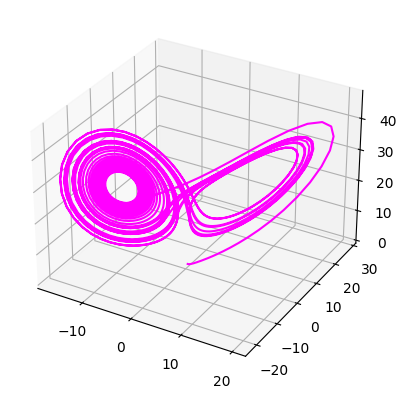

In [18]:
fig = plt.figure()
axes1 = plt.axes(projection='3d')
axes1.plot(ans[:, 0], ans[:, 1], ans[:, 2], c='magenta')

例三：求解高阶常微分方程
**求解二阶RLC振荡电路的数值解**
$$
\begin{cases}
\frac{d^2 u}{dt^2} + \frac{R}{L} * \frac{du}{dt} + \frac{1}{LC} * u = 0 \\
u(0) = U_0\\
u'(0) = 0\\
\end{cases}
$$

对于二阶常微分方程，需要引入变量，将二阶微分转化为一阶微分。在本例之中，使用$v = \frac{du}{dt}$来降阶。
再令$\alpha = \frac {R}{L}$,$\omega_0^2 = \frac{1}{LC}$
此时，方程转换为如下形式：
$$
\begin{cases}
\frac{du}{dt} = v \\
\frac{dv}{dt} = - \alpha * v - \omega_0^2 * u \\
u(0) = U_0 \\
u'(0) = 0 \\
\end{cases}
$$

In [19]:
def deriv(Y, t, a, w):
    u, v = Y
    dY_dt = [v, -a * v - w ** 2 * u]
    return dY_dt


t = np.linspace(0, 20, 1000)  # 创建t的定义域
params1 = (1, 0.6)  # 过阻尼状态：a^2 - w^2 >0
params2 = (1, 1)  # 临界阻尼状态，使用元组来实现解包运算
params3 = (0.6, 1)  # 欠阻尼状态

Y0 = (1.0, 0)  # 定义u和v的初始状态
Y1 = odeint(deriv, y0=Y0, t=t, args=params1)
Y1

array([[ 1.00000000e+00,  0.00000000e+00],
       [ 9.99928360e-01, -7.13538638e-03],
       [ 9.99715228e-01, -1.41282781e-02],
       ...,
       [ 6.67898564e-05, -1.66144952e-05],
       [ 6.64557649e-05, -1.67605684e-05],
       [ 6.61188028e-05, -1.69013519e-05]])

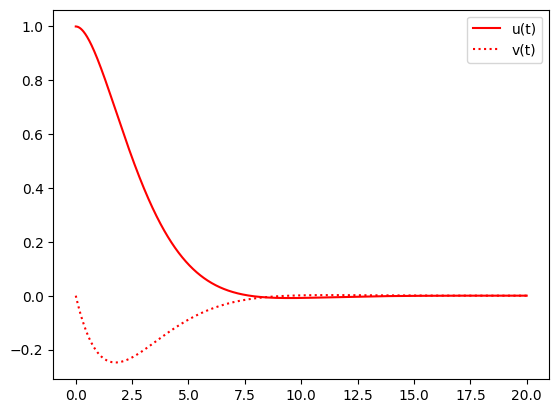

In [21]:
plt.plot(t, Y1[:, 0], 'r-', label='u(t)')
plt.plot(t, Y1[:, 1], 'r:', label='v(t)')
plt.legend()
plt.show()

## 边值问题
**定义**：在微分方程中，边值问题是一个微分方程和一组称之为边界条件的约束条件。边值问题的解通常是符合约束条件的微分方程的解。

**三类边值问题：**
1. 第一类边值问题，也称迪利克雷边界条件，直接给出微分方程边界上的数值：
$$
\begin{cases}
y(a) = ya \\
y(b) = yb \\
\end{cases}
$$
2. 第二类边值问题，也称诺伊曼边界条件，给出了导数作为已知条件。
$$
\begin{cases}
y'(a) = ya \\
y'(b) = yb \\
\end{cases}
$$
3. 第三类边值问题：导数与原方程的线性组合。
$$
\begin{cases}
y'(a) - y(a) = a \\
y'(b) - y(b) = b \\
\end{cases}
$$


`scipy`使用`integrate.solve_bvp()`来求解微分方程的第一类边值问题
`solve_bvp()`函数中微分方程的标准形式：
$$
\begin{cases}
y' = f(x,y), \quad a<x<b \\
g(y(a),y(b) = 0)\\
\end{cases}
$$
在scipy官方文档之中对于微分方程组的说明如下：
> Right-hand side of the system. The calling signature is fun(x, y), or fun(x, y, p) if parameters are present. All arguments are ndarray: x with shape (m,), y with shape (n, m), meaning that y[:, i] corresponds to x[i], and p with shape (k,). The return value must be an array with shape (n, m) and with the same layout as y.

**注意：** `y[i]`代表原函数的i阶导数，`p`代表所需的参数。返回值必须按如下形状：（n*m）的 数组。使用`np.vstack()`将0阶、一阶、二阶 ··· 的组合成为`np.ndarray`

**例一：**
一阶常微分的边值问题：
$$
\begin{cases}
y'' + |y|  = 0 \\
y_{(x=0)} = 0.5 \\
y_{(x=4)} = -1.5 \\
\end{cases}
$$

引入变量$y_0 = y$,$\frac{dy}{dx} = y_1$将方程转换为如下形式：
$$
\begin{cases}
y_0' = y_1 \\
y_1' = -|y_0| \\
y_{(x = 0)} - 0.5 = 0 \\
y_{(x = 4)} +1.5 = 0 \\
\end{cases}
$$

In [35]:
def dydx(x, y):
    """
    定义导数函数
    :param x:
    :param y:
    :return:
    """
    dy0 = y[1]
    dy1 = -abs(y[0])
    return np.vstack([dy0, dy1])


def boundaryCondition(ya, yb):
    """
    定义边界情况
    :param ya:
    :param yb:
    :return:
    """
    fa = 0.5
    fb = -1.5
    return np.array([ya[0] - fa, yb[0] - fb])

In [39]:
low, high = 0, 4
x0 = np.linspace(low, high, 11)  # 生成等差数列，从0到4，一共一百项
y0 = np.zeros((2, x0.size))  # 生成2*x0.size的全零矩阵

In [73]:
from scipy.integrate import solve_bvp

ans = solve_bvp(dydx, boundaryCondition, x0, y0)
ans

       message: The maximum number of mesh nodes is exceeded.
       success: False
        status: 1
             x: [ 0.000e+00  4.000e-01 ...  3.933e+00  4.000e+00]
           sol: <scipy.interpolate._interpolate.PPoly object at 0x000001A9D268B150>
             p: None
             y: [[ 5.000e-01  6.938e-01 ... -1.394e+00 -1.500e+00]
                 [ 5.991e-01  3.571e-01 ... -1.547e+00 -1.644e+00]]
            yp: [[ 5.991e-01  3.571e-01 ... -1.547e+00 -1.644e+00]
                 [-5.000e-01 -6.938e-01 ... -1.394e+00 -1.500e+00]]
 rms_residuals: [ 1.875e-04  2.333e-04 ...  1.425e-06  1.462e-06]
         niter: 7

In [58]:
ans.sol(xSol)[1]

array([ 0.59905159,  0.57836198,  0.55672378,  0.53417689,  0.51076123,
        0.48651669,  0.46148317,  0.43570058,  0.40920883,  0.38204781,
        0.35425747,  0.32588327,  0.2969757 ,  0.26758396,  0.23775725,
        0.20754476,  0.1769957 ,  0.14615925,  0.11508463,  0.08382103,
        0.05241778,  0.02092892, -0.0105928 , -0.04209667, -0.07353195,
       -0.10484792, -0.13599385, -0.16691902, -0.1975727 , -0.22790416,
       -0.25786242, -0.28739453, -0.31645431, -0.34499752, -0.37297991,
       -0.40035724, -0.42708525, -0.4531197 , -0.47841635, -0.50293094,
       -0.52661897, -0.54943822, -0.5713565 , -0.59234304, -0.61236705,
       -0.63139776, -0.64940438, -0.66635612, -0.68222222, -0.69697188,
       -0.71057611, -0.72301897, -0.73428193, -0.744346  , -0.7531954 ,
       -0.75795903, -0.74592194, -0.73615619, -0.72367563, -0.70963651,
       -0.69672157, -0.69229782, -0.69080006, -0.69013803, -0.69026683,
       -0.69124545, -0.69303483, -0.69568905, -0.70059989, -0.70

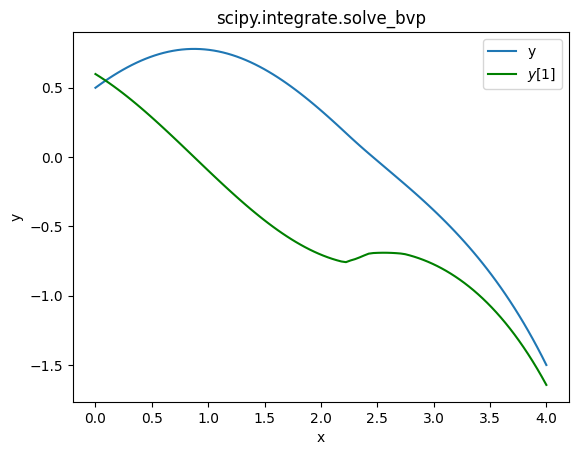

In [59]:
xSol = np.linspace(low, high, 100)  # 输出的网格节点
ySol = ans.sol(xSol)[0]  # 网格节点处的 y 值

plt.plot(xSol, ySol, label='y')
plt.plot(xSol, ans.sol(xSol)[1], 'g-', label='$y[1]$')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("scipy.integrate.solve_bvp")
plt.show()

In [57]:
li1 = [1, 2, 3, 4]
li2 = [4, 5, 6, 7]
np.array([li1, li2]).shape

(2, 4)

In [62]:
y = np.zeros(x0.size)

In [63]:
ans2 = solve_bvp(dydx, boundaryCondition, x0, y0)
ans2

       message: The maximum number of mesh nodes is exceeded.
       success: False
        status: 1
             x: [ 0.000e+00  4.000e-01 ...  3.933e+00  4.000e+00]
           sol: <scipy.interpolate._interpolate.PPoly object at 0x000001A9D29418A0>
             p: None
             y: [[ 5.000e-01  6.938e-01 ... -1.394e+00 -1.500e+00]
                 [ 5.991e-01  3.571e-01 ... -1.547e+00 -1.644e+00]]
            yp: [[ 5.991e-01  3.571e-01 ... -1.547e+00 -1.644e+00]
                 [-5.000e-01 -6.938e-01 ... -1.394e+00 -1.500e+00]]
 rms_residuals: [ 1.875e-04  2.333e-04 ...  1.425e-06  1.462e-06]
         niter: 7

In [64]:
ans.sol(xSol)

array([[ 0.5       ,  0.52378407,  0.54670678,  0.56873615,  0.58984024,
         0.60998708,  0.62914472,  0.6472812 ,  0.66436456,  0.68036285,
         0.69524408,  0.70897849,  0.72154876,  0.73294097,  0.74314123,
         0.75213565,  0.75991032,  0.76645136,  0.77174486,  0.77577693,
         0.77853368,  0.78000664,  0.78020028,  0.77912095,  0.77677501,
         0.77316883,  0.76830875,  0.76220113,  0.75485234,  0.74626874,
         0.73645685,  0.72543135,  0.71321727,  0.69984021,  0.6853258 ,
         0.66969963,  0.65298732,  0.63521447,  0.6164067 ,  0.59658962,
         0.57578934,  0.55404124,  0.53138638,  0.50786559,  0.48351968,
         0.45838947,  0.43251578,  0.40593942,  0.37870122,  0.35084198,
         0.32240389,  0.2934384 ,  0.26399404,  0.23411865,  0.20386121,
         0.17328361,  0.14286796,  0.11291047,  0.08341333,  0.05445795,
         0.02604954, -0.00198641, -0.02992504, -0.0578199 , -0.085704  ,
        -0.11361054, -0.14157286, -0.16962462, -0.1

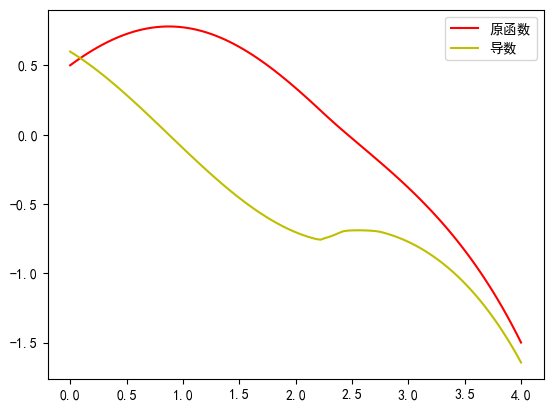

In [76]:
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["SimHei"]  #设置字体
plt.rcParams["axes.unicode_minus"] = False  #该语句解决图像中的“-”负号的乱码问题

plt.plot(xSol, ans2.sol(xSol)[0], 'r-', label='原函数')
plt.plot(xSol, ans2.sol(xSol)[1], 'y-', label='导数')

plt.legend()
plt.show()

In [77]:
np.sum(ans.sol(xSol) == ans2.sol(xSol))  # 这证明y0只需要是与x0一一对应的全零数组就可以

200

**例二：** 水滴横截面的形状
微分方程如下：
$$
\begin{cases}
\frac{d^2h}{dx^2}+[1-h(0)]*[1+( \frac{dh}{dx} ) ^2]^{3/2} = 0 \\
h_{(x=-1)} = h_{(x = 1)} = 0 \\
\end{cases}
$$

同样，需要对该方程进行处理：令$y_0 = h,\quad y1 = \frac{d y_0}{dx}$:
$$
\begin{cases}
y_1 = y_0' \\
y_1 ' = -(1-h)*(1+y_1^2)^{(3/2)} \\
h_{(x = -1)} = h_{(x = 1)} = 0 \\
\end{cases}
$$

In [78]:
def dh_dx(x, y):
    dy0 = y[1]
    dy1 = (y[0] - 1) * (1 + dy0 ** 2) ** (3 / 2)
    return np.vstack([dy0, dy1])


def boundary_condition(ya, yb):
    return np.array([ya[0] - 0, yb[0] - 0])


In [79]:
low = -1
high = 1
x = np.linspace(low,high,50)
y = np.zeros((2,x.size))
res = solve_bvp(dh_dx,boundary_condition,x,y)
res

       message: The algorithm converged to the desired accuracy.
       success: True
        status: 0
             x: [-1.000e+00 -9.592e-01 ...  9.592e-01  1.000e+00]
           sol: <scipy.interpolate._interpolate.PPoly object at 0x000001A9D413BD80>
             p: None
             y: [[-4.815e-34  4.083e-02 ...  4.083e-02 -3.504e-34]
                 [ 1.059e+00  9.457e-01 ... -9.457e-01 -1.059e+00]]
            yp: [[ 1.059e+00  9.457e-01 ... -9.457e-01 -1.059e+00]
                 [-3.090e+00 -2.501e+00 ... -2.501e+00 -3.090e+00]]
 rms_residuals: [ 1.999e-04  1.177e-04 ...  1.177e-04  1.999e-04]
         niter: 1

In [80]:
res.sol(x)

array([[-4.81482486e-34,  4.08301364e-02,  7.74694132e-02,
         1.10606622e-01,  1.40740620e-01,  1.68246642e-01,
         1.93415346e-01,  2.16477170e-01,  2.37618245e-01,
         2.56991202e-01,  2.74722732e-01,  2.90919026e-01,
         3.05669772e-01,  3.19051150e-01,  3.31128108e-01,
         3.41956126e-01,  3.51582581e-01,  3.60047834e-01,
         3.67386075e-01,  3.73626006e-01,  3.78791373e-01,
         3.82901393e-01,  3.85971077e-01,  3.88011480e-01,
         3.89029877e-01,  3.89029877e-01,  3.88011480e-01,
         3.85971077e-01,  3.82901393e-01,  3.78791373e-01,
         3.73626006e-01,  3.67386075e-01,  3.60047834e-01,
         3.51582581e-01,  3.41956126e-01,  3.31128108e-01,
         3.19051150e-01,  3.05669772e-01,  2.90919026e-01,
         2.74722732e-01,  2.56991202e-01,  2.37618245e-01,
         2.16477170e-01,  1.93415346e-01,  1.68246642e-01,
         1.40740620e-01,  1.10606622e-01,  7.74694132e-02,
         4.08301364e-02, -4.14707331e-18],
       [ 1.05

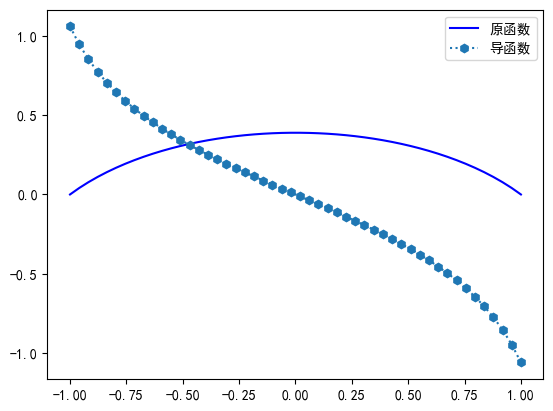

In [83]:
plt.plot(x,res.sol(x)[0],'b-',label = '原函数')
plt.plot(x,res.sol(x)[1],'h:',label = '导函数')
plt.legend()
plt.show()

**例三：** Mathieu问题的特征函数。Mathieu 在研究椭圆形膜的边界值问题时，导出了一个二阶常微分方程，其形式为：
$$
\frac{d^2y}{dx^2}+[ \lambda - 2q \cos(2x)] y = 0
$$
用这种形式的数学方程可以描述自然中的物理现象，包括振动椭圆鼓、四极质谱仪和四极离子阱、周期介质中的波动、强制振荡器参数共振现象、广义相对论中的平面波解决方案、量子摆哈密顿函数的本征函数、旋转电偶极子的斯塔克效应。

同样，我们使用$y_1 = \frac{dy}{dx}$来替换掉一阶导数，之后得到如下的方程组：
$$
\begin{cases}
y_1 = y_0 ' \\
y_1 ' = [2q \cos(2x) - \lambda ] * y_0 \\
y_0(x=0) = 1 \\
y_1(x=0) = 0 \\
y_1(x = \pi) = 0 \\
\end{cases}
$$

In [97]:
def dy_dx(x,y,p):
    _lambda = p    # 解包运算
    q = 10
    y1 = y[1]
    y2 = (2*q*np.cos(2*x)-_lambda) * y[0]
    return np.vstack([y1,y2])

def boundary_condition_3(ya,yb,p):
    """
    定义边界条件。虽然在函数之中并没有使用到参数，但是scipy要求在约束函数之中也传入p
    :param ya:
    :param yb:
    :param p:
    :return:
    """
    return np.array([ya[0]-1,ya[1],yb[1]])       # 返回数组的长度必须是len(ya)+len(p)

In [100]:
p = (10,)

x_low = 0
x_high = np.pi
x_range = np.linspace(x_low,x_high,100)
y_range = np.zeros((2,x_range.size))

res_3 = solve_bvp(dy_dx,boundary_condition_3,x_range,y_range,p)
res_3

       message: A singular Jacobian encountered when solving the collocation system.
       success: False
        status: 2
             x: [ 0.000e+00  3.173e-02 ...  3.110e+00  3.142e+00]
           sol: <scipy.interpolate._interpolate.PPoly object at 0x000001A9D6F62110>
             p: [ 1.000e+01]
             y: [[ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
                 [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]]
            yp: [[ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
                 [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]]
 rms_residuals: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
         niter: 1

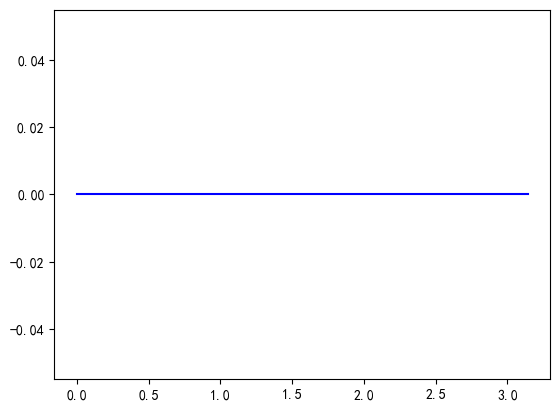

In [101]:
plt.plot(x_range,res_3.sol(x_range)[1],'b-')
plt.show()

*似乎该方程会对初始值敏感*